In [229]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from scipy.stats import pearsonr

from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

import seaborn as sns
import sys
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_selection import mutual_info_classif
import os
# from cnmf import cNMF, save_df_to_npz, load_df_from_npz
import harmonypy
from adjustText import adjust_text

from matplotlib.patches import Patch
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle
from matplotlib.pyplot import rc_context

In [230]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [231]:
starCAT_usage = pd.read_csv("Output\starCAT_cd34_usage.rf_usage_normalized_uned.txt", sep = '\t', index_col = 0, header = 0)
starCAT_usage

1             2             3             4  \
BM1_bcBSQM     3.677671e-02  2.636874e-02  1.242303e-02  4.617509e-01   
BM1_bcCHLB     1.032970e-02  2.510219e-03  1.413848e-07  4.309305e-01   
BM1_bcFZFC     6.093162e-02  6.394398e-04  6.040270e-03  3.907690e-01   
BM1_bcGZEW     4.409884e-02  3.056242e-02  4.078245e-05  5.137985e-01   
BM1_bcFMRM     3.974472e-02  6.799438e-04  1.954722e-06  2.964830e-01   
...                     ...           ...           ...           ...   
Samp26_bcDOUR  2.103140e-13  1.648728e-04  1.125409e-04  1.899038e-01   
Samp26_bcFXTL  2.031784e-12  1.341205e-02  1.688693e-04  3.515361e-06   
Samp26_bcBAMF  3.543679e-09  8.521772e-04  1.081230e-07  9.677583e-10   
Samp26_bcFDMD  2.831554e-01  2.540906e-11  8.400288e-15  4.651272e-15   
Samp26_bcIGXL  1.087095e-16  2.859346e-06  7.297304e-08  1.848628e-06   

                          5             6             7             8  \
BM1_bcBSQM     1.340358e-06  1.666028e-11  1.556348e-05  9.910415e-08   
BM1_bcCHLB     1.696970e-07  4.161671e-05  2.053958e-02  1.170341e-02   
BM1_bcFZFC     2.075728e-05  2.228542e-08  1.514527e-07  7.920502e-03   
BM1_bcGZEW     4.038946e-07  2.222373e-05  2.253429e-07  9.068392e-03   
BM1_bcFMRM     2.882646e-04  3.702672e-08  3.825991e-06  1.227958e-11   
...                     ...           ...           ...           ...   
Samp26_bcDOUR  2.288984e-13  1.552219e-07  1.245927e-05  2.756994e-05   
Samp26_bcFXTL  1.382721e-11  6.626845e-05  3.437750e-02  1.388167e-03   
Samp26_bcBAMF  2.475209e-02  1.524602e-12  4.021217e-18  3.105985e-13   
Samp26_bcFDMD  5.406218e-11  2.587240e-11  1.352682e-10  5.184193e-15   
Samp26_bcIGXL  3.882993e-12  4.019026e-09  2.250802e-04  1.308400e-08   

                          9            10  ...        26            27  \
BM1_bcBSQM     1.150016e-06  1.279033e-08  ...  0.065120  1.793926e-01   
BM1_bcCHLB     1.650429e-02  1.726620e-02  ...  0.003412  4.582433e-02   
BM1_bcFZFC     4.753657e-02  5.530346e-03  ...  0.008689  6.090664e-02   
BM1_bcGZEW     3.150593e-02  5.660615e-08  ...  0.009764  1.123790e-01   
BM1_bcFMRM     1.951676e-06  9.520846e-08  ...  0.003766  1.032901e-01   
...                     ...           ...  ...       ...           ...   
Samp26_bcDOUR  1.493659e-03  1.049002e-02  ...  0.358503  3.666500e-02   
Samp26_bcFXTL  1.171927e-01  2.228556e-11  ...  0.087626  8.716278e-02   
Samp26_bcBAMF  2.091143e-02  9.441815e-04  ...  0.187594  4.475743e-12   
Samp26_bcFDMD  1.475159e-11  1.860002e-02  ...  0.000003  4.726653e-02   
Samp26_bcIGXL  1.377946e-14  5.980710e-02  ...  0.281174  2.858638e-03   

                         28            29            30            31  \
BM1_bcBSQM     6.762988e-10  2.390596e-05  1.637229e-02  1.006177e-02   
BM1_bcCHLB     9.741557e-08  5.090886e-07  7.201078e-03  1.587102e-02   
BM1_bcFZFC     3.320095e-04  3.572867e-04  1.372902e-02  2.939451e-04   
BM1_bcGZEW     2.299682e-06  1.228424e-08  1.950741e-03  9.109432e-13   
BM1_bcFMRM     4.352285e-03  2.116075e-04  8.757741e-03  5.000295e-05   
...                     ...           ...           ...           ...   
Samp26_bcDOUR  1.303619e-01  6.937848e-11  6.363262e-06  1.408679e-25   
Samp26_bcFXTL  2.140811e-02  2.942044e-14  1.303178e-14  7.835133e-06   
Samp26_bcBAMF  3.627175e-03  6.756378e-03  9.628452e-10  7.478393e-05   
Samp26_bcFDMD  1.965248e-10  4.655864e-16  4.354013e-11  5.170437e-10   
Samp26_bcIGXL  2.511098e-02  4.721504e-12  1.101451e-08  9.063957e-09   

                         32        33            34            35  
BM1_bcBSQM     1.094188e-02  0.030933  1.797462e-04  2.310557e-07  
BM1_bcCHLB     2.597822e-02  0.212741  5.046561e-08  2.185356e-05  
BM1_bcFZFC     1.172360e-02  0.139822  9.442738e-03  8.634889e-05  
BM1_bcGZEW     4.730848e-02  0.001551  4.945196e-06  5.963787e-02  
BM1_bcFMRM     5.145191e-02  0.185155  1.248822e-05  1.502979e-06  
...                     ...       ...           ...           ...  
Samp26_bcDOUR  1.036048e-05  0

In [232]:
cNMF_usage = pd.read_csv("cNMF4.usages.k_35.dt_0_15.consensus_norm.txt", sep = '\t', index_col = 0, header = 0)
cNMF_usage

1         2         3         4         5         6         7  \
0      0.010573  0.005482  0.003018  0.108772  0.000000  0.000000  0.000000   
1      0.003601  0.000000  0.000000  0.119793  0.000000  0.000000  0.005878   
2      0.018220  0.000000  0.001477  0.094118  0.000000  0.000000  0.000000   
3      0.010845  0.005354  0.000000  0.100597  0.000000  0.000000  0.000000   
4      0.011229  0.000000  0.000000  0.066747  0.000003  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
55494  0.431061  0.000000  0.000000  0.000000  0.000453  0.000303  0.000000   
55495  0.003651  0.000000  0.000000  0.187316  0.000000  0.000000  0.000000   
55496  0.030610  0.002471  0.000000  0.084396  0.000024  0.000000  0.000000   
55497  0.003660  0.000000  0.000000  0.132662  0.000764  0.000109  0.000000   
55498  0.015343  0.000000  0.000000  0.009402  0.000000  0.000000  0.000000   

              8         9        10  ...        26        27        28  \
0      0.000000  0.000000  0.000000  ...  0.015088  0.084750  0.000000   
1      0.003177  0.004928  0.006099  ...  0.000000  0.023837  0.000000   
2      0.001861  0.012237  0.001673  ...  0.000501  0.027980  0.000000   
3      0.001747  0.006698  0.000000  ...  0.000797  0.044465  0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000  0.045472  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
55494  0.001127  0.000000  0.000518  ...  0.027738  0.000000  0.000000   
55495  0.000000  0.006195  0.000000  ...  0.007077  0.000000  0.081422   
55496  0.000253  0.001314  0.000000  ...  0.012688  0.000000  0.014450   
55497  0.013598  0.001198  0.000000  ...  0.013966  0.020109  0.129837   
55498  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.110923   

             29        30        31        32        33        34        35  
0      0.000000  0.004228  0.002668  0.000000  0.005538  0.000000  0.000000  
1      0.000000  0.000756  0.004941  0.002743  0.045898  0.000000  0.000000  
2      0.000019  0.003070  0.000000  0.000000  0.026691  0.001789  0.000000  
3      0.000000  0.000000  0.000000  0.004635  0.000000  0.000000  0.008143  
4      0.000000  0.000869  0.000000  0.005446  0.031987  0.000000  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
55494  0.000000  0.000000  0.013252  0.000000  0.000000  0.000593  0.000000  
55495  0.000000  0.000000  0.000000  0.000000  0.000000  0.000222  0.000000  
55496  0.000000  0.000000  0.002150  0.000000  0.006471  0.000436  0.000000  
55497  0.000000  0.000000  0.009130  0.000000  0.000000  0.000000  0.000203  
55498  0.000000  0.000000  0.000805  0.087906  0.000000  0.000000  0.000000  

[55155 rows x 35 columns]

### UMAP Visualization

In [233]:
import scanpy as sc

In [234]:
hultCD34 = sc.read_h5ad("./R_to_Py/hultCD34.h5ad")

In [235]:
print(hultCD34.obs.columns)

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'age', 'cluster',
       'broad_age_range', 'narrow_age_range', 'subcluster'],
      dtype='object')


In [236]:
hultCD34[hultCD34.obs.nFeature_RNA]

View of AnnData object with n_obs × n_vars = 57678 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'age', 'cluster', 'broad_age_range', 'narrow_age_range', 'subcluster'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_umap'

In [237]:
print(hultCD34[hultCD34.obs.nFeature_RNA].X[:5, :5])

[[-0.27563008  2.33392447 -0.08863119 -0.34819399 -0.35774955]
 [-0.27563008 -0.21846778 -0.08863119 -0.34819399  1.71955414]
 [-0.27563008 -0.21846778 -0.08863119 -0.34819399  2.15748139]
 [-0.27563008 -0.21846778 -0.08863119 -0.34819399 -0.35774955]
 [-0.27563008  2.45903528 -0.08863119 -0.34819399 -0.35774955]]


In [238]:
print(hultCD34[hultCD34.obs.nFeature_RNA].raw.X.shape)

(57678, 41569)


In [239]:
print(hultCD34.obs.cluster.unique())

['Uncommitted' 'Granulocyte' 'Lymphoid' 'Monocyte/DC' 'Erythroid'
 'Megakaryocyte' 'Basophil/Mast']


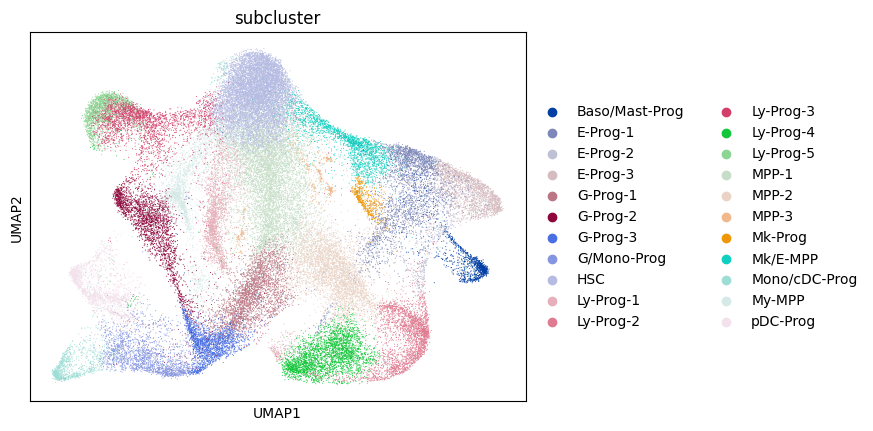

In [240]:
sc.pl.umap(hultCD34, color="subcluster")

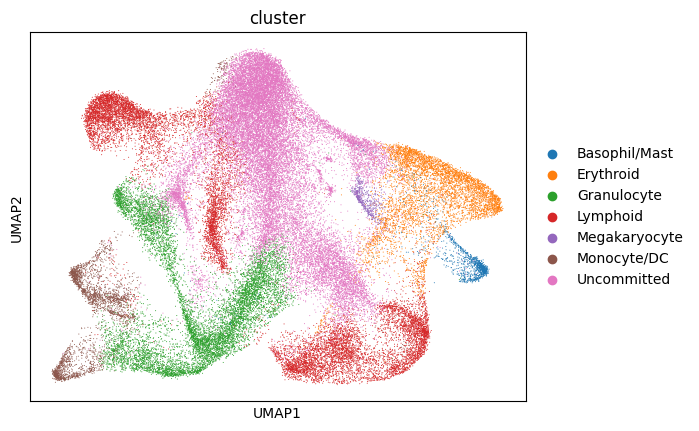

In [241]:
sc.pl.umap(hultCD34, color="cluster")

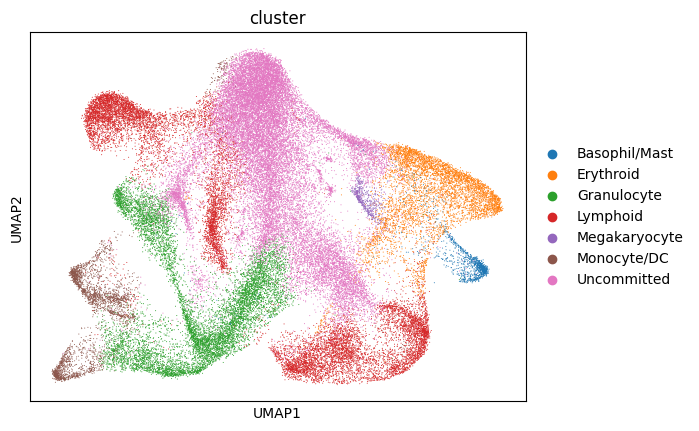

In [242]:
sc.pl.umap(hultCD34, color='cluster')

#### Normalizing cNMF data

In [243]:
from sklearn.preprocessing import MinMaxScaler

In [244]:
scaler = MinMaxScaler()

In [245]:
cNMF_usage_norm = pd.DataFrame(scaler.fit_transform(cNMF_usage), columns=cNMF_usage.columns, index=cNMF_usage.index)

In [246]:
cNMF_usage_norm.to_csv('cNMF4.usages.k_35.dt_0_15.consensus_norm.txt', index=True, sep='\t')

#### Graphing Heatmaps of top 5%

Interesting GEPs
- GEP1 – Monocyte Lineage
- GEP4 – Elderly-biased HSC
- GEP6 – Late-Erythroid Lineage
- GEP14 – Basophil/Mast Cell Lineage
- GEP25 – Dendritic Cell Lineage
- GEP26 – Lymphoid Lineage
- GEP28 – Fetal-biased HSC
- GEP30 – Granulocyte Lineage
- GEP32 – Erythroid Lineage

*taken from cols*

Testing out GEPs

In [247]:
geps = [1, 4, 6, 14, 25, 26, 28, 30, 32]

In [248]:
for gep in cNMF_usage.columns:
    hultCD34.obs[f'GEP{gep}_cNMF'] = cNMF_usage[gep].values

ValueError: Length of values (55155) does not match length of index (57678)

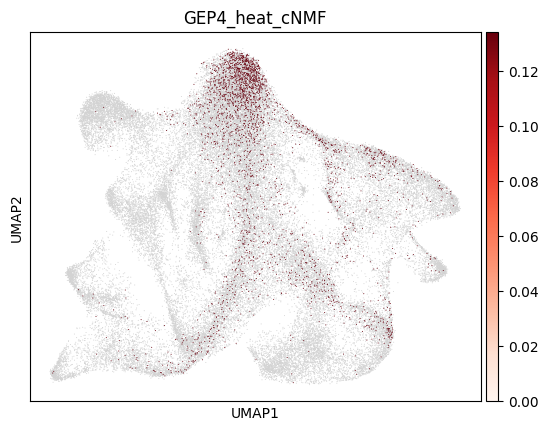

In [ ]:
percentile_95 = np.percentile(hultCD34.obs['GEP4_cNMF'], 95)

hultCD34.obs['GEP4_heat_cNMF'] = hultCD34.obs['GEP4_cNMF'].apply(lambda x: x if x >= percentile_95 else np.nan)

sc.pl.umap(hultCD34, color='GEP4_heat_cNMF', cmap='Reds', vmin=0, vmax=percentile_95)

In [89]:
for gep in starCAT_usage.columns:
    hultCD34.obs[f'GEP{gep}_starCAT'] = starCAT_usage[gep].values

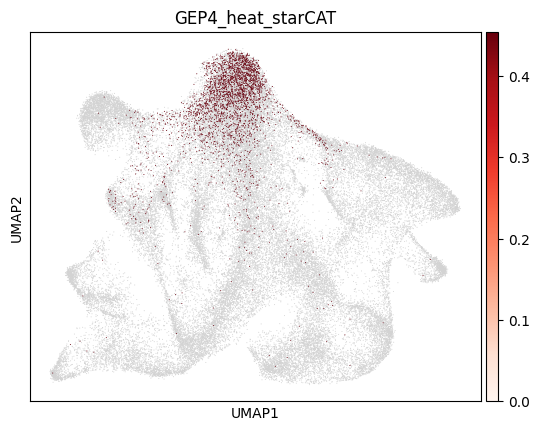

In [ ]:
percentile_95 = np.percentile(hultCD34.obs['GEP4_starCAT'], 95)

hultCD34.obs['GEP4_heat_starCAT'] = hultCD34.obs['GEP4_starCAT'].apply(lambda x: x if x >= percentile_95 else np.nan)

sc.pl.umap(hultCD34, color='GEP4_heat_starCAT', cmap='Reds', vmin=0, vmax=percentile_95)

#### Plot side by side for comparison

Assistance from chatGPT

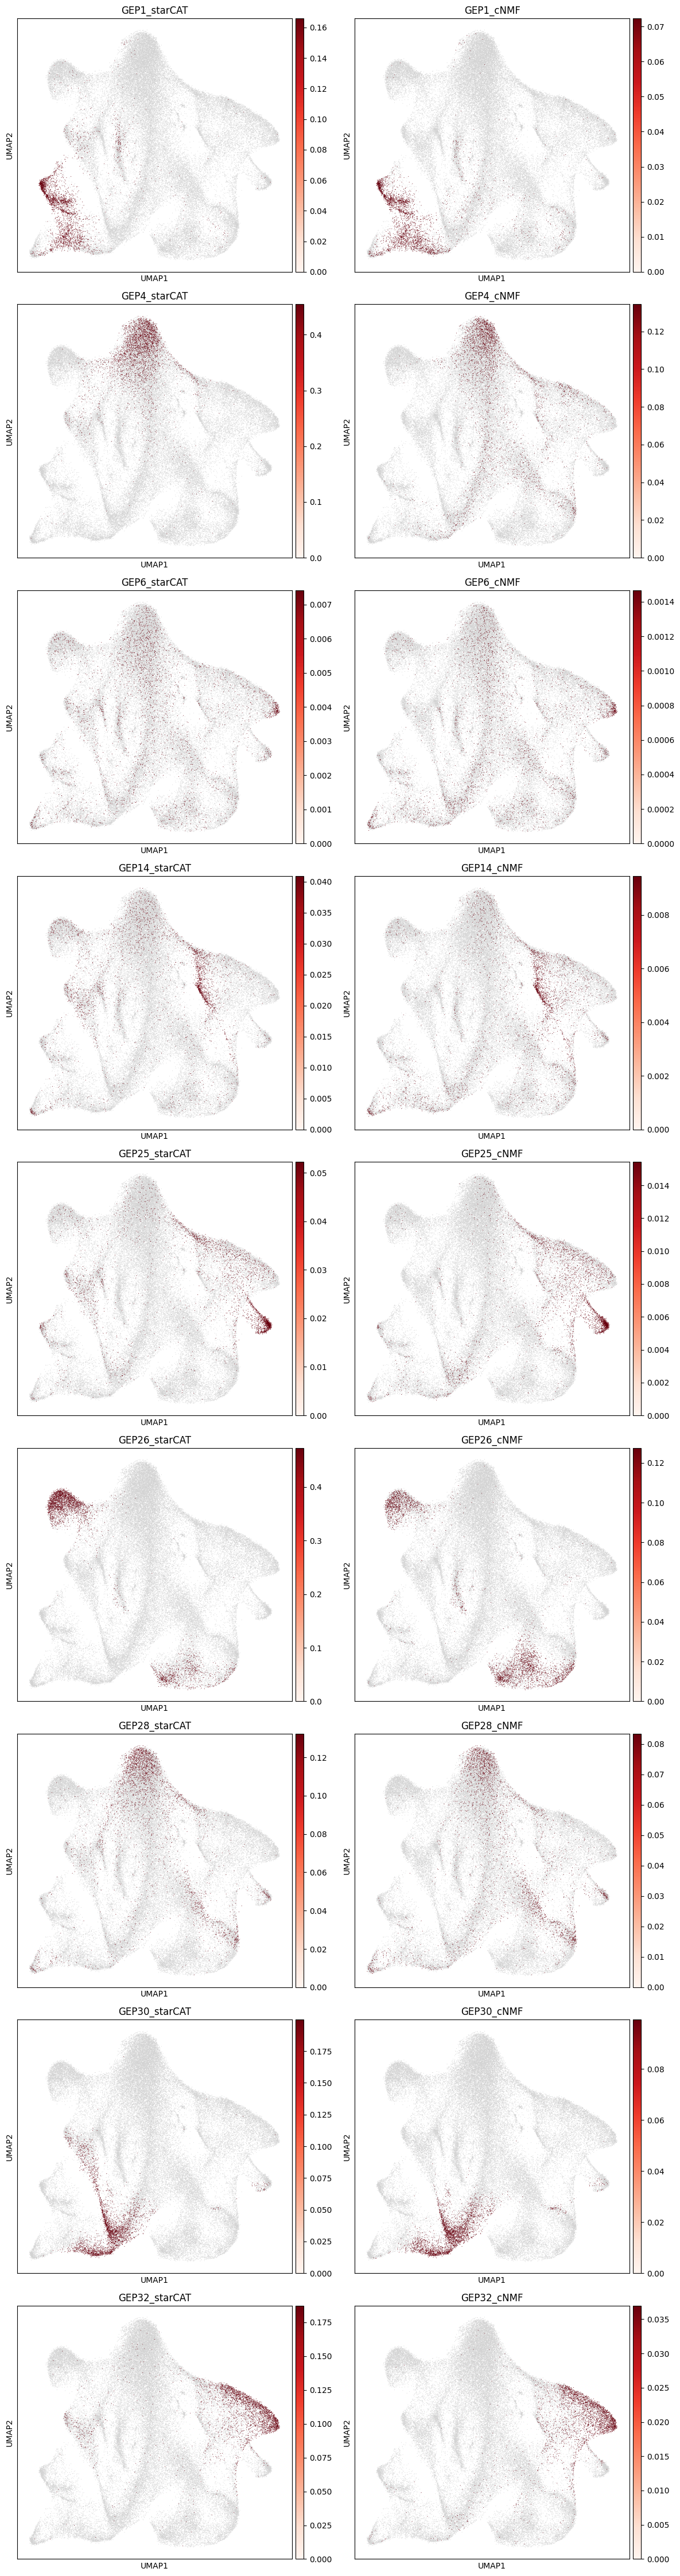

In [ ]:
geps = [1, 4, 6, 14, 25, 26, 28, 30, 32]

# Set up the subplots for the GEPs
fig, axes = plt.subplots(len(geps), 2, figsize=(12, len(geps)*5))

# Loop through each GEP and create the plots
for i, gep in enumerate(geps):
    percentile_95_starCAT = np.percentile(hultCD34.obs[f'GEP{gep}_starCAT'], 95)
    hultCD34.obs[f'GEP{gep}_heat_starCAT'] = hultCD34.obs[f'GEP{gep}_starCAT'].apply(
        lambda x: x if x >= percentile_95_starCAT else np.nan
    )
    
    sc.pl.umap(hultCD34, color=f'GEP{gep}_heat_starCAT', cmap='Reds', 
               vmin=0, vmax=percentile_95_starCAT, 
               ax=axes[i, 0], show=False, title=f'GEP{gep}_starCAT')

    percentile_95_cNMF = np.percentile(hultCD34.obs[f'GEP{gep}_cNMF'], 95)
    hultCD34.obs[f'GEP{gep}_heat_cNMF'] = hultCD34.obs[f'GEP{gep}_cNMF'].apply(
        lambda x: x if x >= percentile_95_cNMF else np.nan
    )
    
    sc.pl.umap(hultCD34, color=f'GEP{gep}_heat_cNMF', cmap='Reds', 
               vmin=0, vmax=percentile_95_cNMF, 
               ax=axes[i, 1], show=False, title=f'GEP{gep}_cNMF')

plt.tight_layout()
plt.show()

## Correlation Plots


In [ ]:
starCAT_usage

1             2             3             4  \
BM1_bcBSQM     3.677671e-02  2.636874e-02  1.242303e-02  4.617509e-01   
BM1_bcCHLB     1.032970e-02  2.510219e-03  1.413848e-07  4.309305e-01   
BM1_bcFZFC     6.093162e-02  6.394398e-04  6.040270e-03  3.907690e-01   
BM1_bcGZEW     4.409884e-02  3.056242e-02  4.078245e-05  5.137985e-01   
BM1_bcFMRM     3.974472e-02  6.799438e-04  1.954722e-06  2.964830e-01   
...                     ...           ...           ...           ...   
Samp26_bcDOUR  2.103140e-13  1.648728e-04  1.125409e-04  1.899038e-01   
Samp26_bcFXTL  2.031784e-12  1.341205e-02  1.688693e-04  3.515361e-06   
Samp26_bcBAMF  3.543679e-09  8.521772e-04  1.081230e-07  9.677583e-10   
Samp26_bcFDMD  2.831554e-01  2.540906e-11  8.400288e-15  4.651272e-15   
Samp26_bcIGXL  1.087095e-16  2.859346e-06  7.297304e-08  1.848628e-06   

                          5             6             7             8  \
BM1_bcBSQM     1.340358e-06  1.666028e-11  1.556348e-05  9.910415e-08   
BM1_bcCHLB     1.696970e-07  4.161671e-05  2.053958e-02  1.170341e-02   
BM1_bcFZFC     2.075728e-05  2.228542e-08  1.514527e-07  7.920502e-03   
BM1_bcGZEW     4.038946e-07  2.222373e-05  2.253429e-07  9.068392e-03   
BM1_bcFMRM     2.882646e-04  3.702672e-08  3.825991e-06  1.227958e-11   
...                     ...           ...           ...           ...   
Samp26_bcDOUR  2.288984e-13  1.552219e-07  1.245927e-05  2.756994e-05   
Samp26_bcFXTL  1.382721e-11  6.626845e-05  3.437750e-02  1.388167e-03   
Samp26_bcBAMF  2.475209e-02  1.524602e-12  4.021217e-18  3.105985e-13   
Samp26_bcFDMD  5.406218e-11  2.587240e-11  1.352682e-10  5.184193e-15   
Samp26_bcIGXL  3.882993e-12  4.019026e-09  2.250802e-04  1.308400e-08   

                          9            10  ...        26            27  \
BM1_bcBSQM     1.150016e-06  1.279033e-08  ...  0.065120  1.793926e-01   
BM1_bcCHLB     1.650429e-02  1.726620e-02  ...  0.003412  4.582433e-02   
BM1_bcFZFC     4.753657e-02  5.530346e-03  ...  0.008689  6.090664e-02   
BM1_bcGZEW     3.150593e-02  5.660615e-08  ...  0.009764  1.123790e-01   
BM1_bcFMRM     1.951676e-06  9.520846e-08  ...  0.003766  1.032901e-01   
...                     ...           ...  ...       ...           ...   
Samp26_bcDOUR  1.493659e-03  1.049002e-02  ...  0.358503  3.666500e-02   
Samp26_bcFXTL  1.171927e-01  2.228556e-11  ...  0.087626  8.716278e-02   
Samp26_bcBAMF  2.091143e-02  9.441815e-04  ...  0.187594  4.475743e-12   
Samp26_bcFDMD  1.475159e-11  1.860002e-02  ...  0.000003  4.726653e-02   
Samp26_bcIGXL  1.377946e-14  5.980710e-02  ...  0.281174  2.858638e-03   

                         28            29            30            31  \
BM1_bcBSQM     6.762988e-10  2.390596e-05  1.637229e-02  1.006177e-02   
BM1_bcCHLB     9.741557e-08  5.090886e-07  7.201078e-03  1.587102e-02   
BM1_bcFZFC     3.320095e-04  3.572867e-04  1.372902e-02  2.939451e-04   
BM1_bcGZEW     2.299682e-06  1.228424e-08  1.950741e-03  9.109432e-13   
BM1_bcFMRM     4.352285e-03  2.116075e-04  8.757741e-03  5.000295e-05   
...                     ...           ...           ...           ...   
Samp26_bcDOUR  1.303619e-01  6.937848e-11  6.363262e-06  1.408679e-25   
Samp26_bcFXTL  2.140811e-02  2.942044e-14  1.303178e-14  7.835133e-06   
Samp26_bcBAMF  3.627175e-03  6.756378e-03  9.628452e-10  7.478393e-05   
Samp26_bcFDMD  1.965248e-10  4.655864e-16  4.354013e-11  5.170437e-10   
Samp26_bcIGXL  2.511098e-02  4.721504e-12  1.101451e-08  9.063957e-09   

                         32        33            34            35  
BM1_bcBSQM     1.094188e-02  0.030933  1.797462e-04  2.310557e-07  
BM1_bcCHLB     2.597822e-02  0.212741  5.046561e-08  2.185356e-05  
BM1_bcFZFC     1.172360e-02  0.139822  9.442738e-03  8.634889e-05  
BM1_bcGZEW     4.730848e-02  0.001551  4.945196e-06  5.963787e-02  
BM1_bcFMRM     5.145191e-02  0.185155  1.248822e-05  1.502979e-06  
...                     ...       ...           ...           ...  
Samp26_bcDOUR  1.036048e-05  0

In [ ]:
cNMF_usage

1         2         3         4         5    6         7  \
0      0.010573  0.005482  0.003018  0.108772  0.000000  0.0  0.000000   
1      0.003601  0.000000  0.000000  0.119793  0.000000  0.0  0.005878   
2      0.018220  0.000000  0.001477  0.094118  0.000000  0.0  0.000000   
3      0.010845  0.005354  0.000000  0.100597  0.000000  0.0  0.000000   
4      0.011229  0.000000  0.000000  0.066747  0.000003  0.0  0.000000   
...         ...       ...       ...       ...       ...  ...       ...   
58035  0.000000  0.000000  0.000000  0.006244  0.000000  0.0  0.000000   
58036  0.000000  0.000371  0.000000  0.000000  0.000000  0.0  0.001418   
58037  0.000000  0.000000  0.000000  0.000000  0.000363  0.0  0.000000   
58038  0.012034  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
58039  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   

              8         9        10  ...        26        27        28  \
0      0.000000  0.000000  0.000000  ...  0.015088  0.084750  0.000000   
1      0.003177  0.004928  0.006099  ...  0.000000  0.023837  0.000000   
2      0.001861  0.012237  0.001673  ...  0.000501  0.027980  0.000000   
3      0.001747  0.006698  0.000000  ...  0.000797  0.044465  0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000  0.045472  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
58035  0.000000  0.000000  0.000431  ...  0.011408  0.002160  0.006319   
58036  0.000053  0.005042  0.000000  ...  0.003424  0.006945  0.001263   
58037  0.000000  0.001392  0.000067  ...  0.011275  0.000000  0.000248   
58038  0.000000  0.000000  0.000825  ...  0.000000  0.003284  0.000000   
58039  0.000000  0.000000  0.004568  ...  0.016503  0.000000  0.002257   

             29        30        31        32        33        34        35  
0      0.000000  0.004228  0.002668  0.000000  0.005538  0.000000  0.000000  
1      0.000000  0.000756  0.004941  0.002743  0.045898  0.000000  0.000000  
2      0.000019  0.003070  0.000000  0.000000  0.026691  0.001789  0.000000  
3      0.000000  0.000000  0.000000  0.004635  0.000000  0.000000  0.008143  
4      0.000000  0.000869  0.000000  0.005446  0.031987  0.000000  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
58035  0.000000  0.000000  0.000000  0.000000  0.001919  0.000000  0.000000  
58036  0.000000  0.000000  0.000000  0.000000  0.002974  0.000000  0.000195  
58037  0.000703  0.000000  0.000000  0.004269  0.019661  0.000000  0.000000  
58038  0.000000  0.000000  0.000000  0.000065  0.011745  0.000000  0.000000  
58039  0.000000  0.000000  0.000000  0.000000  0.019109  0.000000  0.000000  

[57678 rows x 35 columns]

### Interest GEPS

GEP1 – Monocyte Lineage
GEP4 – Elderly-biased HSC
GEP6 – Late-Erythroid Lineage
GEP14 – Basophil/Mast Cell Lineage
GEP25 – Dendritic Cell Lineage
GEP26 – Lymphoid Lineage
GEP28 – Fetal-biased HSC
GEP30 – Granulocyte Lineage
GEP32 – Erythroid Lineage

In [95]:
comp_geps = [0, 3, 5, 13, 24, 25, 27, 29, 31]

starCAT = starCAT_usage.iloc[:, comp_geps]
cNMF = cNMF_usage.iloc[:, comp_geps]

In [96]:
starCAT

1             4             6            14  \
BM1_bcBSQM     3.677671e-02  4.617509e-01  1.666028e-11  4.292342e-04   
BM1_bcCHLB     1.032970e-02  4.309305e-01  4.161671e-05  2.912777e-02   
BM1_bcFZFC     6.093162e-02  3.907690e-01  2.228542e-08  2.634434e-02   
BM1_bcGZEW     4.409884e-02  5.137985e-01  2.222373e-05  1.581992e-02   
BM1_bcFMRM     3.974472e-02  2.964830e-01  3.702672e-08  2.598508e-08   
...                     ...           ...           ...           ...   
Samp26_bcDOUR  2.103140e-13  1.899038e-01  1.552219e-07  1.222677e-04   
Samp26_bcFXTL  2.031784e-12  3.515361e-06  6.626845e-05  3.274993e-21   
Samp26_bcBAMF  3.543679e-09  9.677583e-10  1.524602e-12  4.874222e-08   
Samp26_bcFDMD  2.831554e-01  4.651272e-15  2.587240e-11  6.989457e-05   
Samp26_bcIGXL  1.087095e-16  1.848628e-06  4.019026e-09  6.849463e-06   

                         25        26            28            30  \
BM1_bcBSQM     3.291086e-04  0.065120  6.762988e-10  1.637229e-02   
BM1_bcCHLB     7.444090e-05  0.003412  9.741557e-08  7.201078e-03   
BM1_bcFZFC     4.395756e-04  0.008689  3.320095e-04  1.372902e-02   
BM1_bcGZEW     2.355282e-03  0.009764  2.299682e-06  1.950741e-03   
BM1_bcFMRM     4.710192e-05  0.003766  4.352285e-03  8.757741e-03   
...                     ...       ...           ...           ...   
Samp26_bcDOUR  9.577799e-04  0.358503  1.303619e-01  6.363262e-06   
Samp26_bcFXTL  1.887556e-01  0.087626  2.140811e-02  1.303178e-14   
Samp26_bcBAMF  4.296227e-09  0.187594  3.627175e-03  9.628452e-10   
Samp26_bcFDMD  2.753585e-02  0.000003  1.965248e-10  4.354013e-11   
Samp26_bcIGXL  2.218550e-02  0.281174  2.511098e-02  1.101451e-08   

                         32  
BM1_bcBSQM     1.094188e-02  
BM1_bcCHLB     2.597822e-02  
BM1_bcFZFC     1.172360e-02  
BM1_bcGZEW     4.730848e-02  
BM1_bcFMRM     5.145191e-02  
...                     ...  
Samp26_bcDOUR  1.036048e-05  
Samp26_bcFXTL  3.852680e-03  
Samp26_bcBAMF  1.280222e-01  
Samp26_bcFDMD  7.795859e-03  
Samp26_bcIGXL  4.650205e-08  

[57678 rows x 9 columns]

In [97]:
cNMF

1         4    6        14        25        26        28  \
0      0.010573  0.108772  0.0  0.000000  0.000000  0.015088  0.000000   
1      0.003601  0.119793  0.0  0.006240  0.000000  0.000000  0.000000   
2      0.018220  0.094118  0.0  0.004884  0.000000  0.000501  0.000000   
3      0.010845  0.100597  0.0  0.002422  0.000005  0.000797  0.000000   
4      0.011229  0.066747  0.0  0.000000  0.000000  0.000000  0.000000   
...         ...       ...  ...       ...       ...       ...       ...   
58035  0.000000  0.006244  0.0  0.000000  0.000000  0.011408  0.006319   
58036  0.000000  0.000000  0.0  0.000000  0.006949  0.003424  0.001263   
58037  0.000000  0.000000  0.0  0.000000  0.000000  0.011275  0.000248   
58038  0.012034  0.000000  0.0  0.000000  0.000897  0.000000  0.000000   
58039  0.000000  0.000000  0.0  0.000000  0.001229  0.016503  0.002257   

             30        32  
0      0.004228  0.000000  
1      0.000756  0.002743  
2      0.003070  0.000000  
3      0.000000  0.004635  
4      0.000869  0.005446  
...         ...       ...  
58035  0.000000  0.000000  
58036  0.000000  0.000000  
58037  0.000000  0.004269  
58038  0.000000  0.000065  
58039  0.000000  0.000000  

[57678 rows x 9 columns]

In [173]:
combined_data = pd.concat([starCAT, cNMF], axis = 0)

In [174]:
combined_mean = combined_data.mean()

In [175]:
combined_std = combined_data.std()

In [176]:
normalized_starCAT = (starCAT - combined_mean) / combined_std
normalized_cNMF = (cNMF - combined_mean) / combined_std

In [177]:
normalized_cNMF

1         4         6        14        25        26        28  \
0     -0.245870  0.239875 -0.090647 -0.262497 -0.260783 -0.339618 -0.463710   
1     -0.350418  0.329606 -0.090647  0.005105 -0.260783 -0.463464 -0.463710   
2     -0.131197  0.120564 -0.090647 -0.053030 -0.260783 -0.459353 -0.463710   
3     -0.241792  0.173308 -0.090647 -0.158617 -0.260612 -0.456923 -0.463710   
4     -0.236031 -0.102290 -0.090647 -0.262497 -0.260783 -0.463464 -0.463710   
...         ...       ...       ...       ...       ...       ...       ...   
58035 -0.404419 -0.594898 -0.090647 -0.262497 -0.260783 -0.369824 -0.332460   
58036 -0.404419 -0.645734 -0.090647 -0.262497 -0.042915 -0.435358 -0.437477   
58037 -0.404419 -0.645734 -0.090647 -0.262497 -0.260783 -0.370917 -0.458567   
58038 -0.223956 -0.645734 -0.090647 -0.262497 -0.232664 -0.463464 -0.463710   
58039 -0.404419 -0.645734 -0.090647 -0.262497 -0.222246 -0.328010 -0.416834   

             30        32  
0     -0.287728 -0.400735  
1     -0.337109 -0.355171  
2     -0.304190 -0.400735  
3     -0.347854 -0.323759  
4     -0.335492 -0.310288  
...         ...       ...  
58035 -0.347854 -0.400735  
58036 -0.347854 -0.400735  
58037 -0.347854 -0.329825  
58038 -0.347854 -0.399651  
58039 -0.347854 -0.400735  

[57678 rows x 9 columns]

In [178]:
normalized_starCAT

1         4         6        14        25        26  \
BM1_bcBSQM     0.147075  3.113772 -0.090647 -0.244089 -0.250465  0.071048   
BM1_bcCHLB    -0.249518  2.862837 -0.086561  0.986724 -0.258450 -0.435458   
BM1_bcFZFC     0.509296  2.535848 -0.090644  0.867349 -0.247002 -0.392146   
BM1_bcGZEW     0.256876  3.537536 -0.088465  0.415981 -0.186941 -0.383324   
BM1_bcFMRM     0.191583  1.768186 -0.090643 -0.262496 -0.259307 -0.432554   
...                 ...       ...       ...       ...       ...       ...   
Samp26_bcDOUR -0.404419  0.900434 -0.090631 -0.257254 -0.230755  2.479153   
Samp26_bcFXTL -0.404419 -0.645705 -0.084142 -0.262497  5.657016  0.255774   
Samp26_bcBAMF -0.404419 -0.645734 -0.090647 -0.262495 -0.260783  1.076318   
Samp26_bcFDMD  3.841709 -0.645734 -0.090647 -0.259500  0.602511 -0.463441   
Samp26_bcIGXL -0.404419 -0.645719 -0.090646 -0.262204  0.434768  1.844429   

                     28        30        32  
BM1_bcBSQM    -0.463710 -0.115004 -0.219005  
BM1_bcCHLB    -0.463708 -0.245438  0.030729  
BM1_bcFZFC    -0.456813 -0.152597 -0.206022  
BM1_bcGZEW    -0.463662 -0.320110  0.384996  
BM1_bcFMRM    -0.373305 -0.223299  0.453813  
...                 ...       ...       ...  
Samp26_bcDOUR  2.244140 -0.347763 -0.400563  
Samp26_bcFXTL -0.019025 -0.347854 -0.336747  
Samp26_bcBAMF -0.388367 -0.347854  1.725545  
Samp26_bcFDMD -0.463710 -0.347854 -0.271256  
Samp26_bcIGXL  0.057890 -0.347853 -0.400734  

[57678 rows x 9 columns]

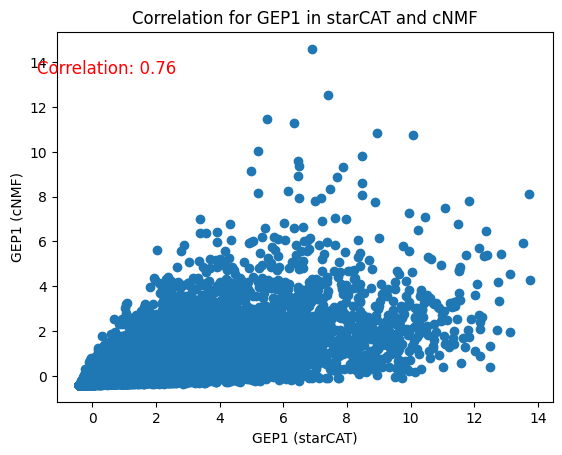

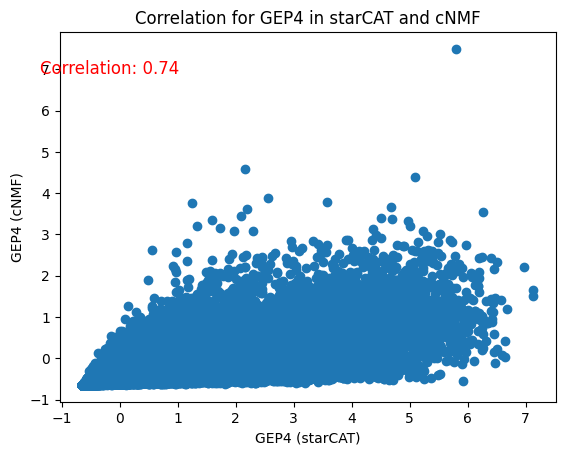

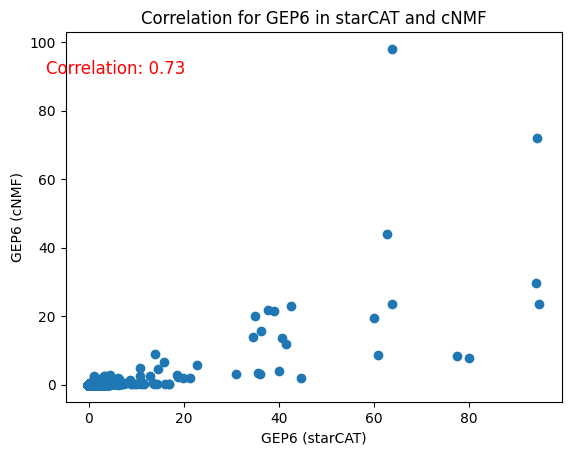

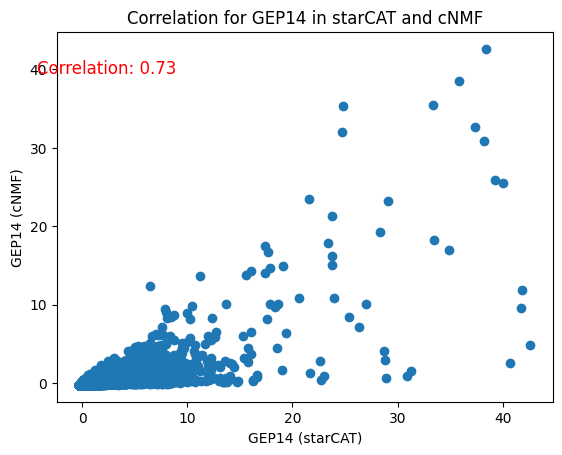

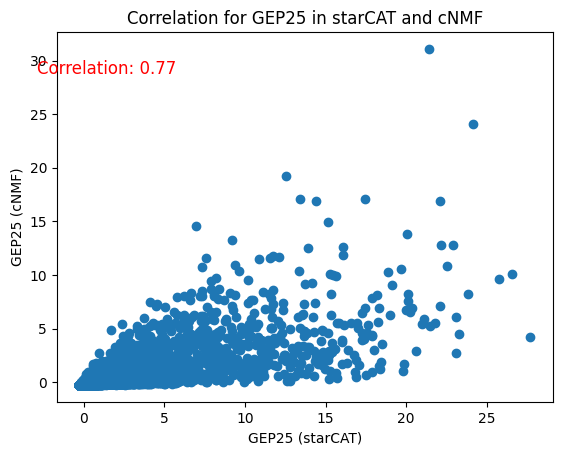

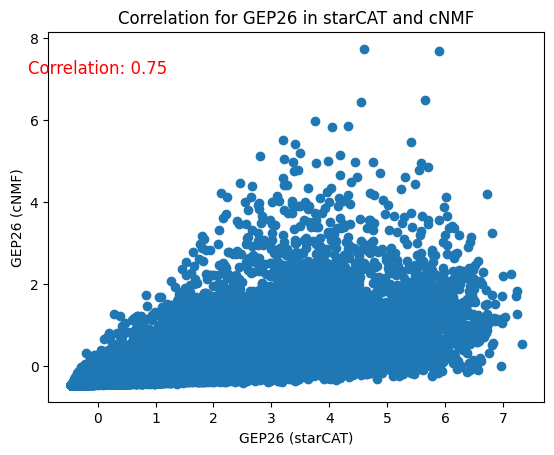

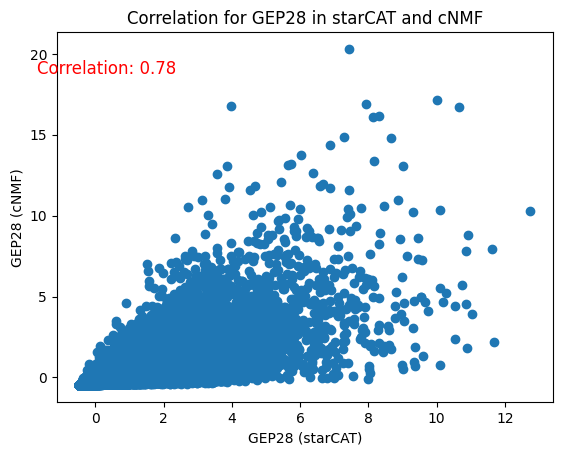

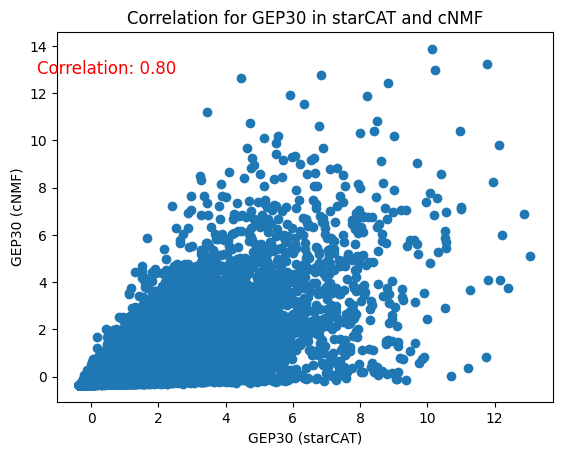

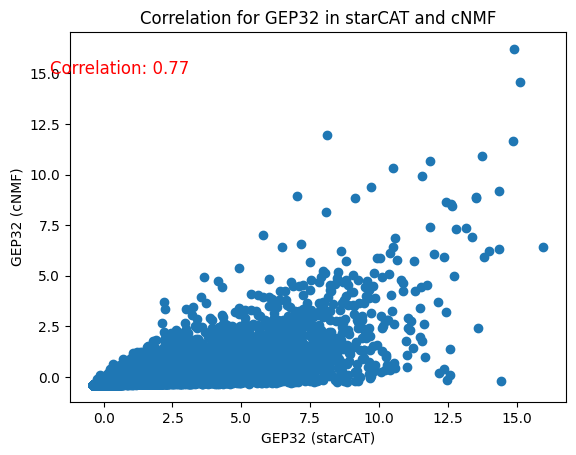

In [ ]:
for gep in normalized_starCAT.columns:
    norm_starCAT_score = normalized_starCAT[gep]
    norm_cNMF_score = normalized_cNMF[gep]

    starCAT_score = starCAT[gep]
    cNMF_score = cNMF[gep]

    gep_corr, _ = pearsonr(norm_starCAT_score, norm_cNMF_score)
    # gep_corr, _ = pearsonr(starCAT_score, cNMF_score)

    # # Plot starCAT points in red
    # plt.scatter(norm_starCAT_score, norm_cNMF_score, color='red', label=f'GEP{gep} (starCAT)', alpha=0.6)

    # # Plot cNMF points in blue
    # plt.scatter(norm_cNMF_score, norm_starCAT_score, color='blue', label=f'GEP{gep} (cNMF)', alpha=0.6)
    # # plt.scatter(starCAT_score, cNMF_score)

    plt.scatter(norm_starCAT_score, norm_cNMF_score)
    plt.title(f'Correlation for GEP{gep} in starCAT and cNMF')
    plt.text(0.1, 0.9, f'Correlation: {gep_corr:.2f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='red')
    plt.xlabel(f'GEP{gep} (starCAT)')
    plt.ylabel(f'GEP{gep} (cNMF)')
    plt.show()


## All columns

In [213]:
starCAT_all = starCAT_usage.iloc[:]
cNMF_all = cNMF_usage.iloc[:]

In [214]:
combined_data_all = pd.concat([starCAT_all, cNMF_all], axis = 0)
combined_mean_all = combined_data_all.mean()
combined_std_all = combined_data_all.std()
normalized_starCAT_all = (starCAT_all - combined_mean_all) / combined_std_all
normalized_cNMF_all = (cNMF_all - combined_mean_all) / combined_std_all

In [228]:
correlation_matrix

array([[0.76381094, 0.80111422, 0.76058813, 0.73746785, 0.69376936,
        0.72969246, 0.78669441, 0.68673418, 0.8429882 , 0.78521508,
        0.77040591, 0.79040174, 0.85539305, 0.72666225, 0.67599688,
        0.82859186, 0.80164831, 0.72009819, 0.81977451, 0.78504197,
        0.66388572, 0.77440367, 0.85904193, 0.76911709, 0.76805816,
        0.74935724, 0.78546523, 0.77818437, 0.81455544, 0.79699294,
        0.72902512, 0.76562698, 0.68175692, 0.73804793, 0.65245896]])

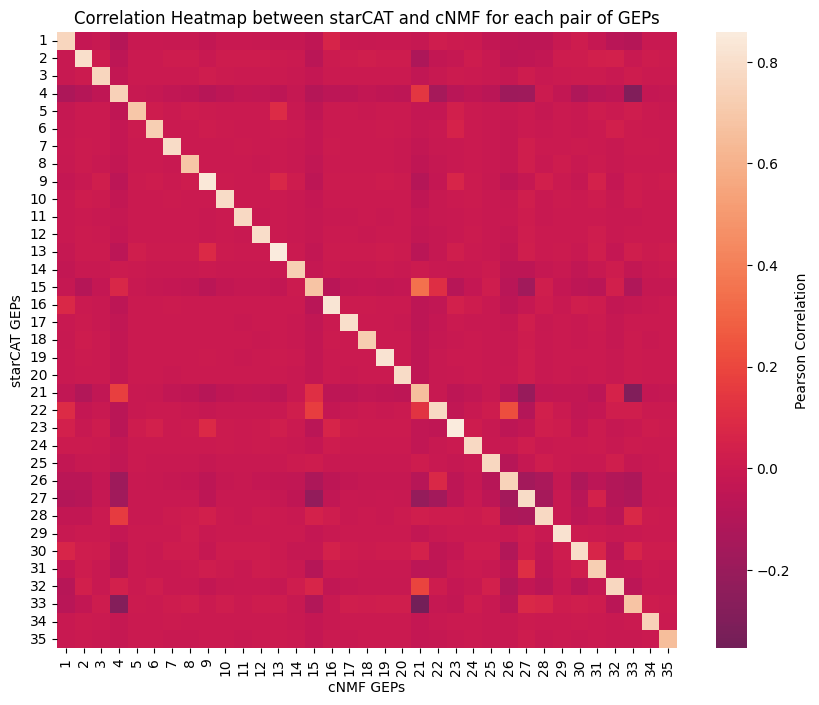

In [ ]:
correlations_matrix = []

for starcat_column in normalized_starCAT_all.columns:
    row_correlations = []
    
    for cnmf_column in normalized_cNMF_all.columns:
        norm_starCAT_score_all = normalized_starCAT_all[starcat_column]
        norm_cNMF_score_all = normalized_cNMF_all[cnmf_column]

        gep_corr, _ = pearsonr(norm_starCAT_score_all, norm_cNMF_score_all)

        row_correlations.append(gep_corr)

    correlations_matrix.append(row_correlations)

correlations_matrix = np.array(correlations_matrix)

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlations_matrix, cmap=sns.color_palette("rocket", as_cmap=True), xticklabels=normalized_cNMF_all.columns, yticklabels=normalized_starCAT_all.columns, cbar_kws={'label': 'Pearson Correlation'}, center=0)

plt.title('Correlation Heatmap between starCAT and cNMF for each pair of GEPs')
plt.xlabel('cNMF GEPs')
plt.ylabel('starCAT GEPs')

plt.show()